# **Project**

> by: Abdullah Albassam 20-06-2022

**Dataset**

> The dataset consists of information about the purchasing behaviour of 2,000 individuals.

> ID: Shows a unique identificator of a customer.

> Sex: Gender of a customer </br> 0- Male </br> 1- Female.

> Marital Status: Marital status of a customer </br> 0- Single </br> 1- non-single.

> Age: The age of the customer in years.

> Education: Level of education of the customer </br>
0- other / unknown </br>
1- high school </br>
2- university </br>
3- graduate school. </br>

> Income: Self-reported annual income in US dollars of the customer.

> Occupation: Category of occupation of the customer. </br>
0- unemployed / unskilled </br>
1- skilled employee / official </br>
2- management / self-employed / highly qualified employee / officer.

> Settlement Size:	The size of the city that the customer lives in. </br>
0- small city </br>
1- mid-sized city </br>
2- big city.




**Data Pre-processing** </br>
1. Read and understand the data carefully. What are the issues (e.g., missing values) that you noticed in the dataset? Apply any cleaning method that you find fit and provide justification of your decisions. Your data cleaning should be comprehensive.

In [ ]:
import pandas as pd   #using pandas libaray to handel and deal with our dataset.
from warnings import filterwarnings
filterwarnings("ignore")

#using read_excel() function to read the dataset
df = pd.read_excel('/content/Customer_Data.xlsx')

In [ ]:
#how many records and columns in our dataset?

nRow, nCol = df.shape 
print(f'There are {nRow} rows and {nCol} columns in the dataset')

There are 2000 rows and 8 columns in the dataset


In [ ]:
#showing the first 7 records.

df.head(7)

ID  Sex  Marital status   Age  Education    Income  Occupation  \
0  100000001    0               0  67.0          2  124670.0           1   
1  100000002    1               1  22.0          1  150773.0           1   
2  100000003    0               0  49.0          1   89210.0           0   
3  100000004    0               0  45.0          1  171565.0           1   
4  100000005    0               0  53.0          1  149031.0           1   
5  100000006    0               0  35.0          1  144848.0           0   
6  100000007    0               0  53.0          1  156495.0           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
5                0  
6                1

In [ ]:
#rename (Marital status) and (Settlement size) because they are not in a proper way

df. rename(columns = {'Marital status':'Marital_status', 'Settlement size':'Settlement_size'}, inplace = True)

In [ ]:
#we will delete ID coulmns because we don't need it in our analysis. 

df.drop('ID', axis = 1, inplace= True)

In [ ]:
df.head(5)

Sex  Marital_status   Age  Education    Income  Occupation  Settlement_size
0    0               0  67.0          2  124670.0           1                2
1    1               1  22.0          1  150773.0           1                2
2    0               0  49.0          1   89210.0           0                0
3    0               0  45.0          1  171565.0           1                1
4    0               0  53.0          1  149031.0           1                1

In [ ]:
#number of missing values for each column in our dataset.

df.isnull().sum()  
#there are 7 missing values in Age and 11 missing values in Income.

Sex                 0
Marital_status      0
Age                 7
Education           0
Income             11
Occupation          0
Settlement_size     0
dtype: int64

In [ ]:
#more information about our dataset 

df.info() #data types: float64(Age,Income), int64(ID,Sex,Marital status,Education,Occupation,Settlement size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2000 non-null   int64  
 1   Marital_status   2000 non-null   int64  
 2   Age              1993 non-null   float64
 3   Education        2000 non-null   int64  
 4   Income           1989 non-null   float64
 5   Occupation       2000 non-null   int64  
 6   Settlement_size  2000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 109.5 KB


In [ ]:
#check unique values in sex(0 and 1), Marital_Status(0 and 1), Education(0,1,2 and 3), Occupation(0,1 and 2), Settlement Size(0,1 and 2)

print(f'The uniques values in Sex column are {df.Sex.unique()}')
print(f'The uniques values in Marital status column are {df.Marital_status.unique()}')
print(f'The uniques values in Education column are {df.Education.unique()}')
print(f'The uniques values in Occupation column are {df.Occupation.unique()}')
print(f'The uniques values in Settlement Size column are {df.Settlement_size.unique()}')

The uniques values in Sex column are [0 1]
The uniques values in Marital status column are [0 1]
The uniques values in Education column are [2 1 0 3]
The uniques values in Occupation column are [1 0 2]
The uniques values in Settlement Size column are [2 0 1]


In [ ]:
#check for duplications

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
#handling the missing values:  
#we will replace missing values for Age feature with median value (33)

df["Age"] = df["Age"].fillna(df['Age'].median())

In [ ]:
#we will replace missing values for Income feature with mode value or most frequent value (69487)

df["Income"] = df["Income"].fillna(df['Income'].mode()[0])

In [ ]:
#check null again

df.isnull().sum()

Sex                0
Marital_status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement_size    0
dtype: int64

In [ ]:
#change the data type of Age from float64 to int64, because the age values are integers depend on the calculation method.

df = df.astype({'Age': 'int64'})
#df = df.astype({'Income': 'int64'})

In [ ]:
df.dtypes

Sex                  int64
Marital_status       int64
Age                  int64
Education            int64
Income             float64
Occupation           int64
Settlement_size      int64
dtype: object

**Exploratory Data Analysis** </br>
2.Provide summary statistics for all variables. Find out the potential outliers for each variable if any.

In [ ]:
#summary statistics for all columns in our dataset

df.describe().T

count      2000.000000
mean     120570.707500
std       38101.930098
min       35832.000000
25%       97306.750000
50%      115381.000000
75%      137758.750000
max      309364.000000
Name: Income, dtype: float64

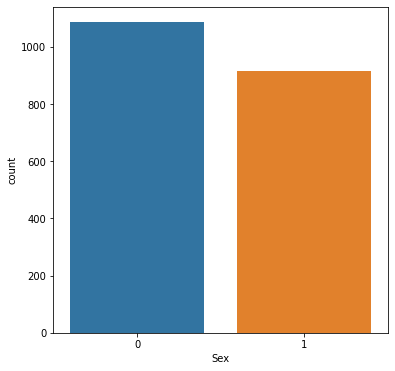

In [ ]:
# check outliers
# [Sex]

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure( figsize=(6, 6))
sns.countplot(x ='Sex', data = df)
plt.show()

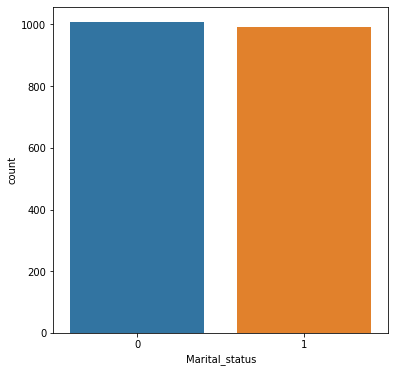

In [ ]:
# check outliers
# [Marital_status]

plt.figure( figsize=(6, 6))
sns.countplot(x ='Marital_status', data = df)
plt.show()

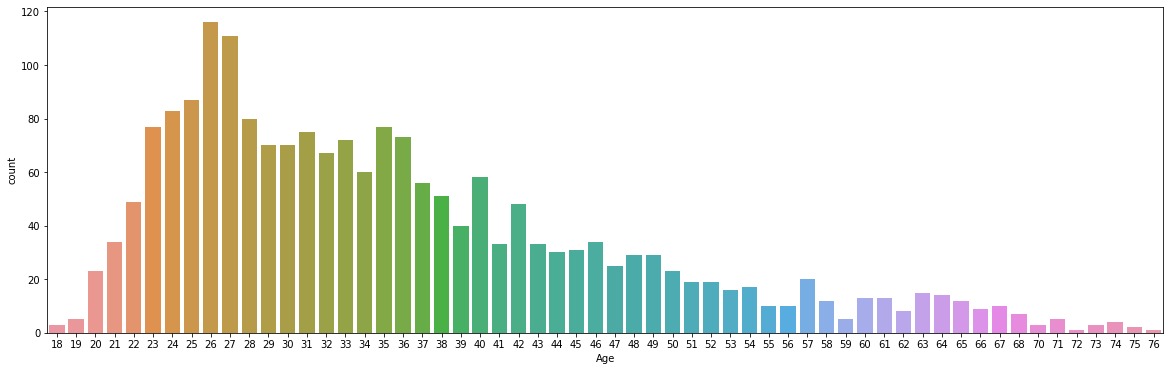

In [ ]:
# check outliers
# [Age]

plt.figure( figsize=(20, 6))
sns.countplot(x ='Age', data = df)
plt.show()

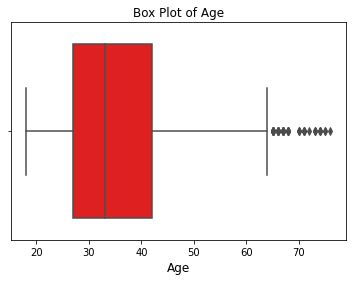

In [ ]:
sns.boxplot(df["Age"], orient = "h", color = "red")
plt.title("Box Plot of Age", fontsize= 12)
plt.xlabel("Age", fontsize= 12)
plt.show()

In [ ]:
#there are ouliers : the age more than 64.5  and less than 4.5

income = df['Age']
Q3 = income.quantile(0.75)
Q1 = income.quantile(0.25)
IQR = Q3-Q1

lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

print(f'Q1:{Q1}\nQ3:{Q3}\nIQR:{IQR}\nlower_limit:{lower_limit}\nupper_limit:{upper_limit}')

Q1:27.0
Q3:42.0
IQR:15.0
lower_limit:4.5
upper_limit:64.5


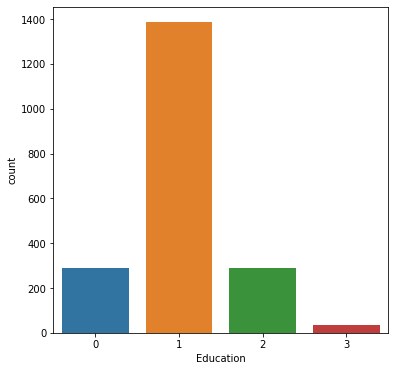

In [ ]:
# check outliers
# [Education]

plt.figure( figsize=(6, 6))
sns.countplot(x ='Education', data = df)
plt.show()

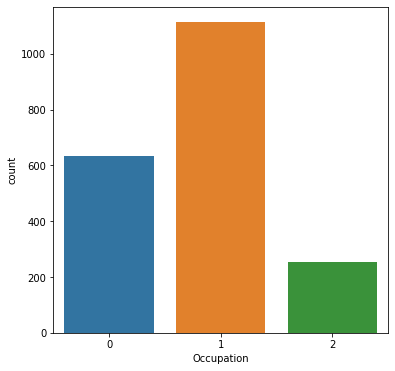

In [ ]:
# check outliers
# [Occupation]

plt.figure( figsize=(6, 6))
sns.countplot(x ='Occupation', data = df)
plt.show()

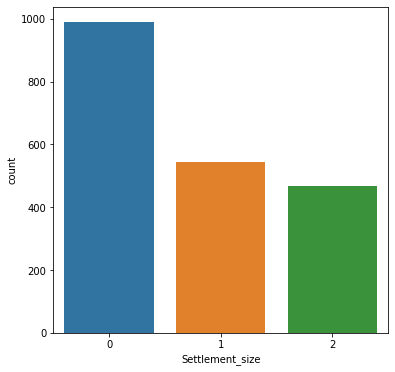

In [ ]:
# check outliers
# [Settlement_size]

plt.figure( figsize=(6, 6))
sns.countplot(x ='Settlement_size', data = df)
plt.show()

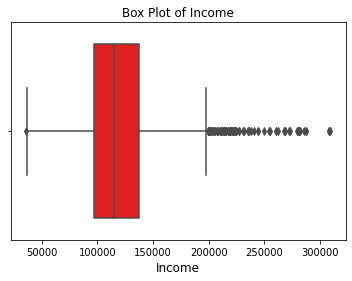

In [ ]:
# check outliers
# [Income]

sns.boxplot(df["Income"], orient = "h", color = "red")
plt.title("Box Plot of Income", fontsize= 12)
plt.xlabel("Income", fontsize= 12)
plt.show()


In [ ]:
#there are ouliers : the income more than 198436.75  and less than 36628.75

income = df['Income']
Q3 = income.quantile(0.75)
Q1 = income.quantile(0.25)
IQR = Q3-Q1

lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

print(f'Q1:{Q1}\nQ3:{Q3}\nIQR:{IQR}\nlower_limit:{lower_limit}\nupper_limit:{upper_limit}')

Q1:97306.75
Q3:137758.75
IQR:40452.0
lower_limit:36628.75
upper_limit:198436.75


In [ ]:
#Example: records that contain upper outliers of income = 80 records
upper_outlier = upper_limit < income
df[upper_outlier]

Sex  Marital_status  Age  Education    Income  Occupation  \
56      0               0   52          1  202575.0           2   
63      0               0   25          0  227385.0           1   
87      0               0   47          1  241068.0           1   
95      0               0   58          2  268340.0           1   
105     0               0   39          1  244716.0           2   
...   ...             ...  ...        ...       ...         ...   
1074    0               1   43          2  280566.0           2   
1076    1               1   71          3  211572.0           2   
1092    1               1   45          2  260847.0           2   
1093    0               0   65          2  285647.0           2   
1097    0               0   57          2  281647.0           2   

      Settlement_size  
56                  2  
63                  2  
87                  1  
95                  1  
105                 2  
...               ...  
1074                2  
1076                1  
1092                2  
1093                2  
1097                1  

[80 rows x 7 columns]

3.	Create a heat map of the correlation matrix that shows correlation coefficients among all the variables in the dataset. What are your observations? 

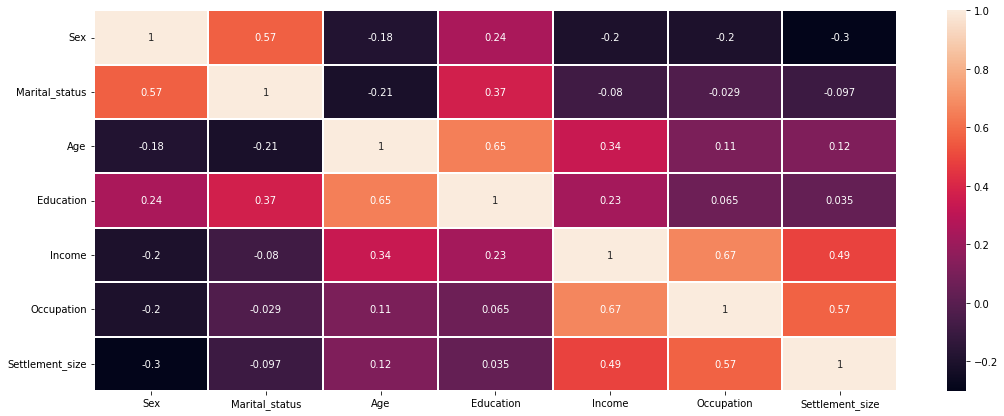

In [ ]:
#heatmap of the correlation matrix
plt.figure(figsize=(18, 7))
sns.heatmap(df.corr(),linewidths = 1,annot = True)
plt.show()

*Some observations from Heatmap:</br>

-   the correlation between Occupation and income is +0.67 and That’s mean the two variables vary in same direction(positive correlation).
-   the correlation between Sex and Settlement_size is -0.3 and That’s mean the two variables vary in opposite direction(negative correlation).
-   there is no clear correlation between Occupation and Marital_status -0.029

4.	Is there any pay-gap between gender? Justify your answer through graph

Average male income is:127582.79097605894
average female income is:112239.06345733041
The different is:15343.727518728527


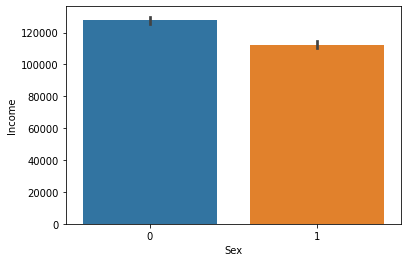

In [ ]:
#plot graph to show is threr pay-gap bewteen gender(0: Male, 1: Female)

average_male_income = df[df['Sex'] == 0]['Income'].mean() 
average_female_income = df[df['Sex'] == 1]['Income'].mean() 

sns.barplot(x = "Sex", y= "Income",  data = df)

print(f'Average male income is:{average_male_income}\naverage female income is:{average_female_income}')
print(f'The different is:{average_male_income - average_female_income}')

#there is small gap between male income and female income about 15343.72 and we can see it in the graph

5.	What percentage of women are married compared to men? 

In [ ]:
#percentage of married men in the dataset
men = df[df['Sex'] == 0]
married_men = men[men['Marital_status'] == 1]['Sex'].count()/df.shape[0] *100

#percentage of married women in the dataset
women = df[df['Sex'] == 1]
married_women = women[women['Marital_status'] == 1]['Sex'].count()/df.shape[0] *100

print(f'Percentage of the married women is:{married_women:.2f}% compared to the percentage of married men is:{married_men:.2f}%')


Percentage of the married women is:36.80% compared to the percentage of married men is:12.85%


**Classification model development** </br>
6.	Perform the normality test for the data (Income and Age) and graphically represent the results. Transform the data if not normally distributed. *italicized text*


**Normality Tests**</br>
In statistics, normality tests are used to check if the data is drawn from a Gaussian distribution or in simple if a variable or in sample has a normal distribution.

There are two ways to test normality,

Graphs for Normality test</br>
Statistical Tests for Normality

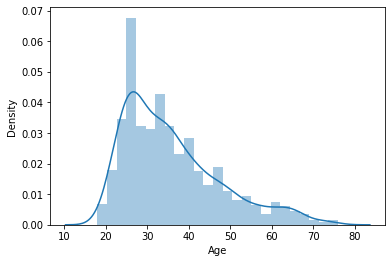

In [ ]:
#using Histogram(1) : One of the popular and commonly used plot to visualize the distribution of the data is a histogram. 

ax_age = sns.distplot(df['Age']);

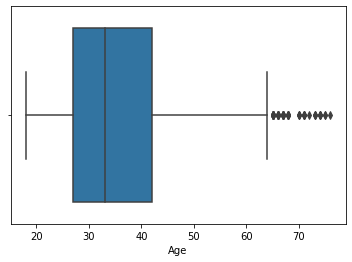

In [ ]:
#using Box Plot(2) : Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable.
#It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

sns.boxplot(df['Age']);

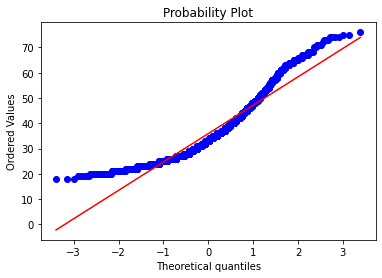

In [ ]:
#using Quantile-Quantile Plot(3): It plots two sets of quantiles against one another.

import scipy.stats as stats
import pylab

stats.probplot(df['Age'],plot=pylab);

#From the plot, we can analyze that the data points of the Age feature are not falling on a straight line.
#This implies that it does not follow a normal distribution.

In [ ]:
#Shapiro-Wilk Test(4): It is the most powerful test to check the normality of a variable. 
#It was proposed in 1965 by Samuel Sanford Shapiro and Martin Wilk.

from scipy.stats import shapiro

stat, p = shapiro(df['Age'])

print(f'stat={stat:.3f}, p={p}')

if p > 0.05: 
  print('probably Gaussian')
else:
  print('probably not Gaussian')


stat=0.915, p=4.7583018028559753e-32
probably not Gaussian


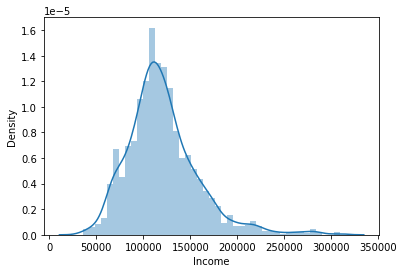

In [ ]:
#using Histogram(1)
ax_age = sns.distplot(df['Income'])

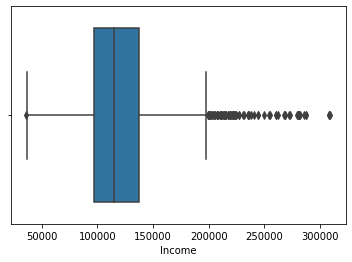

In [ ]:
#using Box Plot(2): 

sns.boxplot(df['Income']);

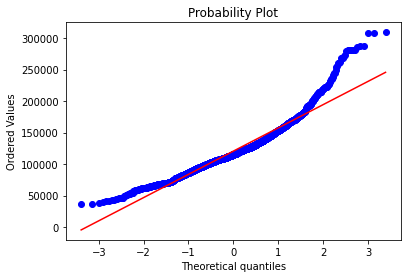

In [ ]:
#using Quantile-Quantile Plot(3): It plots two sets of quantiles against one another.

stats.probplot(df['Income'],plot=pylab);

#From the plot, we can analyze that the data points of the Income feature are not falling on a straight line.
#This implies that it does not follow a normal distribution.

In [ ]:
#Shapiro-Wilk Test(4):

stat, p = shapiro(df['Income'])

print(f'stat={stat:.3f}, p={p}')

if p > 0.05: 
  print('probably Gaussian')
else:
  print('probably not Gaussian')


stat=0.935, p=1.1325948631641695e-28
probably not Gaussian


In [ ]:
#next: transforming to normal distribution.
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

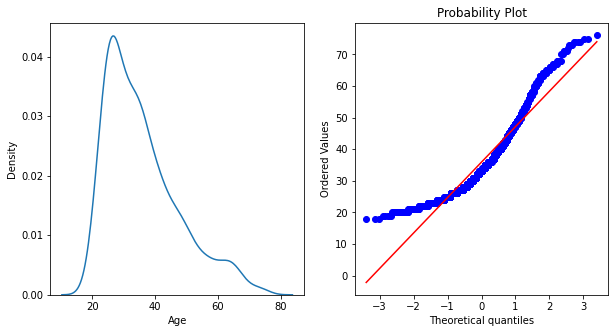

In [ ]:
#1- Age 
normality(df,'Age')

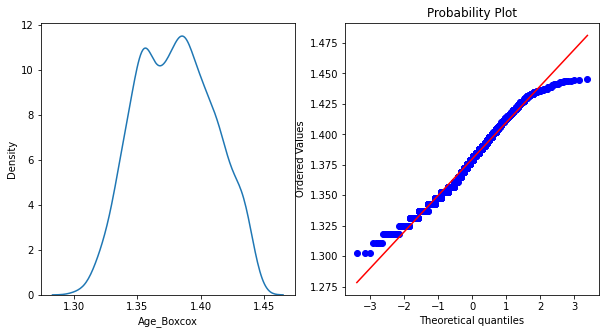

In [ ]:
#by using Box-Cox Transformation

df['Age_Boxcox'],parameters=stats.boxcox(df['Age'])
normality(df,'Age_Boxcox')

#Box cox transformation technique also gives a good result and normally distributes the Age feature.
#The data points on the Q-Q plot are almost on the line as well.

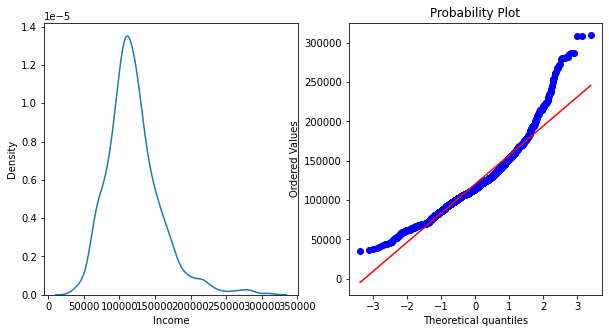

In [ ]:
#2- Income 
normality(df,'Income')

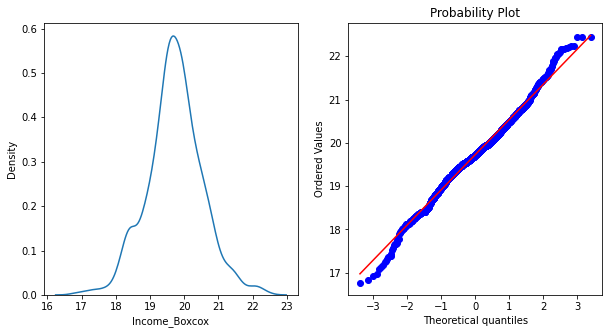

In [ ]:
#by using Box-Cox Transformation

df['Income_Boxcox'],parameters=stats.boxcox(df['Income'])
normality(df,'Income_Boxcox')

#Box cox transformation technique also gives a good result and normally distributes the Income feature.
#The data points on the Q-Q plot are almost on the line as well.

In [ ]:
df.head(5)

Sex  Marital_status  Age  Education    Income  Occupation  Settlement_size  \
0    0               0   67          2  124670.0           1                2   
1    1               1   22          1  150773.0           1                2   
2    0               0   49          1   89210.0           0                0   
3    0               0   45          1  171565.0           1                1   
4    0               0   53          1  149031.0           1                1   

   Age_Boxcox  Income_Boxcox  
0    1.437542      19.931387  
1    1.331456      20.442092  
2    1.415028      19.051774  
3    1.408064      20.793802  
4    1.421112      20.410639

7.	Develop any three classification/clustering models that predict income of the person. 
Briefly describe the interpretation of each model.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)
# df_scalered = scaler.transform(df)

In [ ]:
len(df['Income'].unique())  #most income are unique and this will affect on models scores!

1971

In [ ]:
# we will handling Income feature values by divided it into 4 parts.
# [1] less than 97306
# [2] between 97306 and 115381
# [3] between 115381 and 137758
# [4] above 137758
df.describe()['Income']

count      2000.000000
mean     120570.707500
std       38101.930098
min       35832.000000
25%       97306.750000
50%      115381.000000
75%      137758.750000
max      309364.000000
Name: Income, dtype: float64

In [ ]:
import numpy as np
df['new_income'] = np.nan 

In [ ]:
def fun(data):
  if data < 97306: return 1
  if data > 137758: return 4
  if data >= 97306 and data < 115381: return 2
  if data >= 115381 and data <= 137758: return 3

In [ ]:
df["new_income"] = df["Income"].apply(fun)

In [ ]:
df

Sex  Marital_status  Age  Education    Income  Occupation  \
0       0               0   67          2  124670.0           1   
1       1               1   22          1  150773.0           1   
2       0               0   49          1   89210.0           0   
3       0               0   45          1  171565.0           1   
4       0               0   53          1  149031.0           1   
...   ...             ...  ...        ...       ...         ...   
1995    1               0   47          1  123525.0           0   
1996    1               1   27          1  117744.0           1   
1997    0               0   31          0   86400.0           0   
1998    1               1   24          1   97968.0           0   
1999    0               0   25          0   68416.0           0   

      Settlement_size  Age_Boxcox  Income_Boxcox  new_income  
0                   2    1.437542      19.931387           3  
1                   2    1.331456      20.442092           4  
2                   0    1.415028      19.051774           1  
3                   1    1.408064      20.793802           4  
4                   1    1.421112      20.410639           4  
...               ...         ...            ...         ...  
1995                0    1.411668      19.906806           3  
1996                0    1.357129      19.779416           3  
1997                0    1.372613      18.968937           1  
1998                0    1.342783      19.295430           2  
1999                0    1.347880      18.371548           1  

[2000 rows x 10 columns]

In [ ]:
# step 1: Determine the target and the features
target = df['new_income']
target

0       3
1       4
2       1
3       4
4       4
       ..
1995    3
1996    3
1997    1
1998    2
1999    1
Name: new_income, Length: 2000, dtype: int64

In [ ]:
features = df[["Sex", "Marital_status", "Age","Education","Occupation","Settlement_size"]]
features

Sex  Marital_status  Age  Education  Occupation  Settlement_size
0       0               0   67          2           1                2
1       1               1   22          1           1                2
2       0               0   49          1           0                0
3       0               0   45          1           1                1
4       0               0   53          1           1                1
...   ...             ...  ...        ...         ...              ...
1995    1               0   47          1           0                0
1996    1               1   27          1           1                0
1997    0               0   31          0           0                0
1998    1               1   24          1           0                0
1999    0               0   25          0           0                0

[2000 rows x 6 columns]

In [ ]:
# step 2: Splitting the Data for Training and Testing

from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test= train_test_split(features, target, train_size = 0.7) # train size 70% and test size 30%

In [ ]:
#how many rows for train?
print(X_train.shape[0])

#how many rows for test?
print(X_test.shape[0])

1400
600


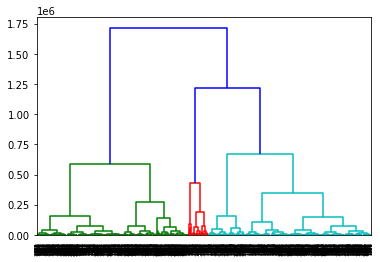

In [ ]:
#model of Hierarchical Clustering
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df,method = 'ward'))
plt.show()

In [ ]:
# step 3: create model (1):KMeans

from sklearn.cluster import KMeans

#Create an instance of K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features)
kmeans.cluster_centers_.shape

(4, 6)

In [ ]:
#Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

Result: 455 out of 2000 samples were correctly labeled.


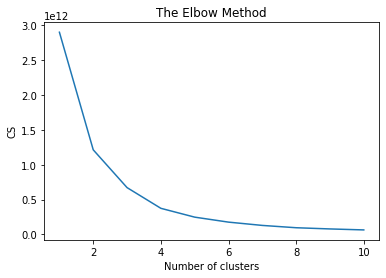

In [ ]:
#Use elbow method to find optimal number of clusters
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
# step 4: create model (1):  K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier  # "Classifier implementing the k-nearest neighbors vote."
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()  #by defult n_neighbors is 5
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [ ]:
#step7: Predicting
predicted = knn.predict(X=X_test) # result after using KNN
expected = y_test

print(predicted[:20])
print(expected[:20])

accuracy_score = accuracy_score(y_test,predicted)
accuracy_score

[1 4 4 1 1 3 1 3 3 4 1 2 4 3 4 2 3 4 1 3]
1775    1
954     2
1199    4
231     3
534     2
768     3
1726    1
932     1
1705    2
816     4
1862    1
1558    2
1127    4
584     4
1038    4
1803    1
1263    3
440     4
1625    1
198     3
Name: new_income, dtype: int64


0.4816666666666667

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(expected, predicted)) 

              precision    recall  f1-score   support

           1       0.62      0.70      0.65       151
           2       0.39      0.38      0.39       150
           3       0.35      0.35      0.35       157
           4       0.56      0.51      0.53       142

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



In [ ]:
# Estimator Method score
# Accuracy Score:

print(f'{knn.score(X_test, y_test):.3%}')  # the result is 0% and its very good score!

48.167%


In [ ]:
# step 5: create model (2):  Random Forests
from sklearn.ensemble import RandomForestClassifier

"""A random forest is a meta estimator that fits a number of decision tree 
classifiers on various sub-samples of the dataset and uses averaging to improve 
the predictive accuracy and control over-fitting.[7]"""

rf = RandomForestClassifier()
rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [ ]:
# Estimator Method score
# Accuracy Score:
print(f'{rf.score(X_test, y_test):.2%}')

51.83%


In [ ]:
# create Naive Bayes model and change hyperparameters


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# hyperparameters
param_gb = {'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Gaussian classifier
gb = GaussianNB() 
  
# GridsearchCV with crossvalidation = 5
gb_cv = GridSearchCV(gb, param_gb, cv = 5)
  
gb_cv.fit(features, target)
  
# Print the tuned parameters and score
print("Tuned GaussianNB  Best Parameters: {}".format(gb_cv.best_params_))
print("Best score is {}".format(gb_cv.best_score_))

Tuned GaussianNB  Best Parameters: {'var_smoothing': 1e-08}
Best score is 0.5215


In [ ]:
# create DecisionTreeClassifier model and change hyperparameters


from sklearn.tree import DecisionTreeClassifier

# hyperparameters
param_dist = {"max_depth": [3,5],
              "criterion": ["gini", "entropy"]}

# Decision Tree classifier
tree = DecisionTreeClassifier() 
  
# GridsearchCV with crossvalidation = 5
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(features, target)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Best Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Best score is 0.5375


In [ ]:
# create SVC model and change hyperparameters


from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 100], 
              'gamma': [1, 0.1, 0.01]} 
  
# SVC Classifier
svc = SVC()

# GridsearchCV with crossvalidation = 5
grid_svc = GridSearchCV(svc , param_grid, cv = 5)
  
# fitting the model for grid search
grid_svc.fit(features, target)

# Print the tuned parameters and score
print("Tuned SVC Best Parameters: {}".format(grid_svc.best_params_))
print("Best score is {}".format(grid_svc.best_score_))

Tuned SVC Best Parameters: {'C': 100, 'gamma': 0.01}
Best score is 0.5185
